In [1]:
from pdf2image import convert_from_path
import os

from paddleocr import PaddleOCR

from PIL import Image, ImageDraw

import numpy as np
import pandas as pd

import time

import math
from typing import Tuple, Union
from statistics import mode, mean

import re
from fuzzywuzzy import fuzz

from utils import TranscriptOCR

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
transcriptocr = TranscriptOCR()

transcriptocr.extract_json("test1.jpg")

[2024/05/03 09:07:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

[2024/05/03 09:07:24] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/05/03 09:07:25] ppocr DEBUG: dt_boxes num : 97, elapsed : 0.740748405456543
[2024/05/03 09:07:40] ppocr DEBUG: rec_res num  : 97, elapsed : 15.549131393432617


{'name': '',
 'university': 'Board of Intermediate Education,A.P.',
 'course': '',
 'course table': [{' Subject': 'ENGLISH',
   ' Maximum Marks  Maximum Marks_2': '100',
   ' Marks Secured': '074',
   ' Marks Secured_2': '067'},
  {' Subject': 'SANSKRIT',
   ' Maximum Marks  Maximum Marks_2': '100',
   ' Marks Secured': '083',
   ' Marks Secured_2': '088'},
  {' Subject': 'MATHEMATICS-A',
   ' Maximum Marks  Maximum Marks_2': nan,
   ' Marks Secured': nan,
   ' Marks Secured_2': nan},
  {' Subject': 'MATHEMATICS-B',
   ' Maximum Marks  Maximum Marks_2': '075',
   ' Marks Secured': '075',
   ' Marks Secured_2': '074'},
  {' Subject': nan,
   ' Maximum Marks  Maximum Marks_2': '075',
   ' Marks Secured': '075',
   ' Marks Secured_2': '070'},
  {' Subject': 'PHYSICS',
   ' Maximum Marks  Maximum Marks_2': '060',
   ' Marks Secured': '039',
   ' Marks Secured_2': '046'},
  {' Subject': 'CHEMISTRY',
   ' Maximum Marks  Maximum Marks_2': '060',
   ' Marks Secured': '040',
   ' Marks Secured_

[2024/05/03 09:07:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/05/03 09:07:42] ppocr DEBUG: dt_boxes num : 75, elapsed : 1.6835293769836426
[2024/05/03 09:08:15] ppocr DEBUG: rec_res num  : 75, elapsed : 32.69230055809021


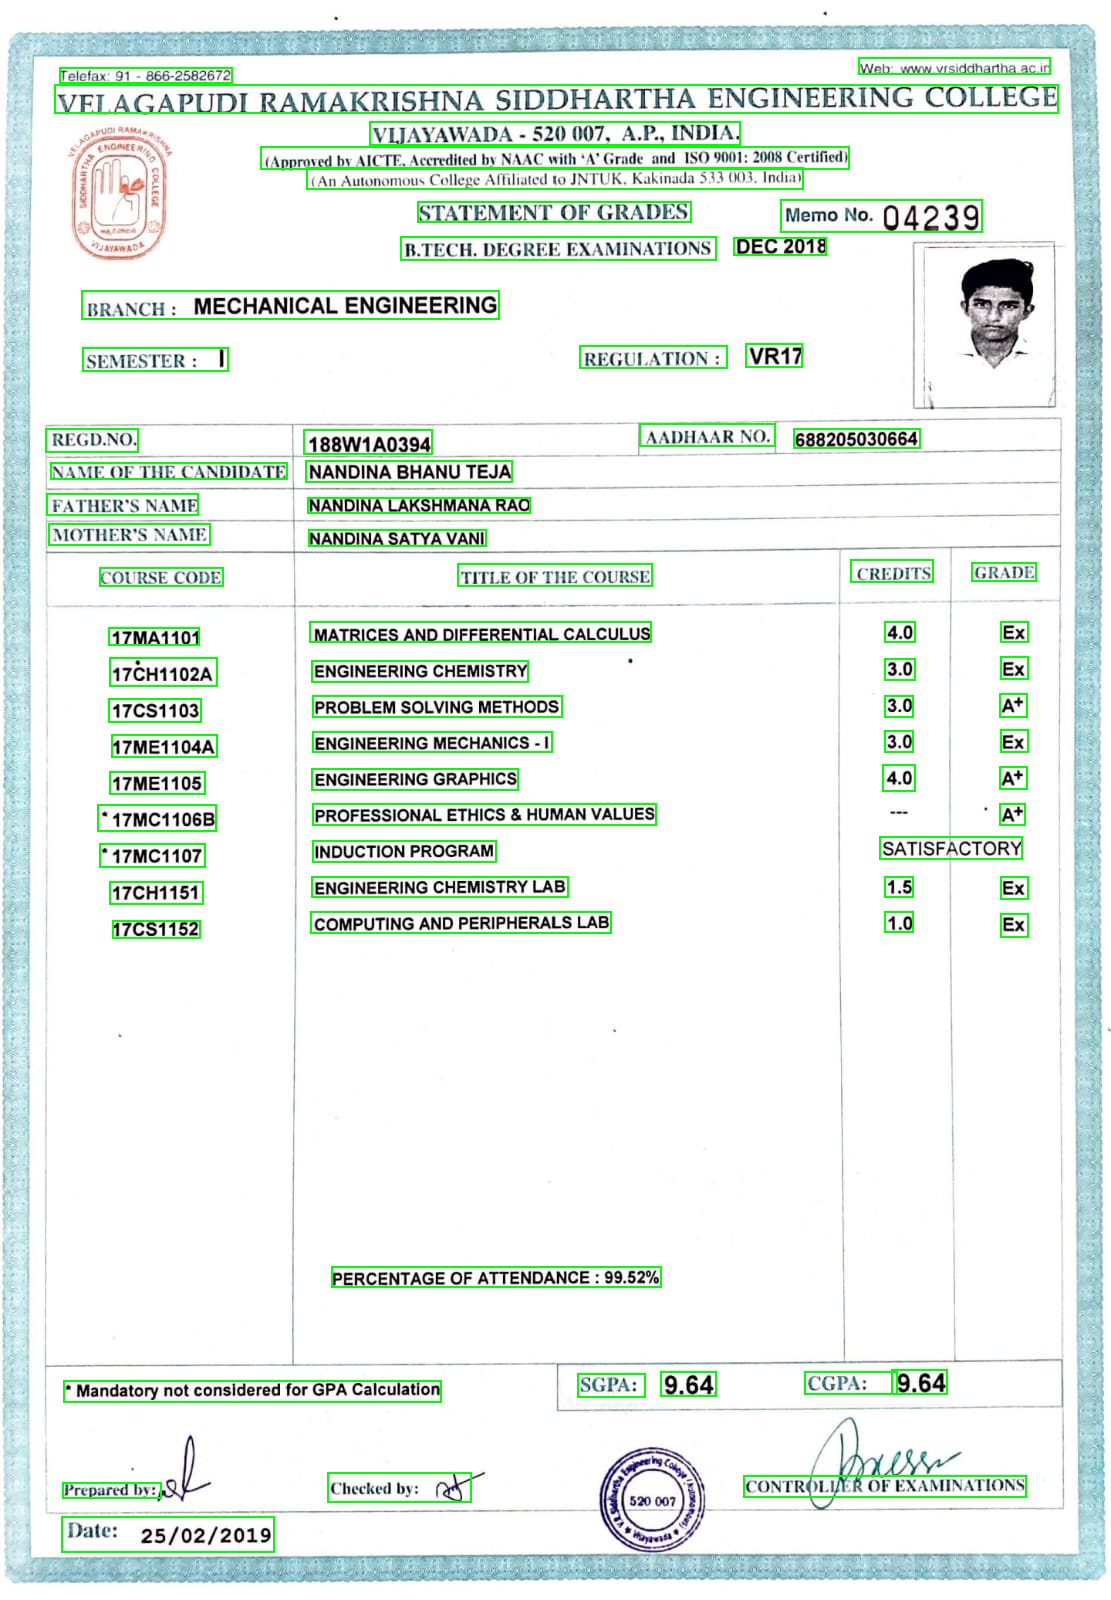

In [3]:
transcriptocr.draw_boxes('test.jpg')

In [11]:
import pandas as pd

file_names = {'Sampled_datasets\data1.csv': '_d1', 'Sampled_datasets\data2.csv': '_d2'}

# Initialize an empty list to store DataFrames
dfs = []

for file, ex in file_names.items():
    df = pd.read_csv(file)
    df = df[['ocr', 'bbox', 'transcription']]
    df['ocr'] = df['ocr'].apply(lambda x: x.split('/')[-1].split('-')[-1].split('.')[0] + ex + '.' + x.split('.')[-1])
    dfs.append(df)

# Concatenate the DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('Sampled_datasets\data.csv', index=False)

In [13]:
import os
import pandas as pd

# Path to the Images folder
images_folder = 'Sampled_datasets/Images/'

# Read the CSV file
df = pd.read_csv('Sampled_datasets/data.csv')

# Get a list of all image names from the CSV file
image_names_csv = df['ocr'].apply(lambda x: x.split('/')[-1].split('-')[-1].split('.')[0]).tolist()

# Get a list of all image names from the Images folder
image_names_folder = [f.split('.')[0] for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

# Check if every image name from the CSV file is in the Images folder
all_images_in_folder = all(image_name in image_names_folder for image_name in image_names_csv)

print("All images from the CSV file are present in the Images folder:", all_images_in_folder)


All images from the CSV file are present in the Images folder: True


: 